In [1]:
import math
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
g = 9.81  
vt = 32.0  
CD = 1.5 / 40  
CL = 1.1  

v0 = vt  
theta0 = 0.0  
x0 = 0.0  
y0 = 1200.0  

In [4]:
def rhs_phugoid(u, CL, CD, g, vt):
    
    v, theta, x, y = u
    rhs = np.array([-g * math.sin(theta) - CD / CL * g / vt**2 * v**2,
                       -g * math.cos(theta) / v + g / vt**2 * v,
                       v * math.cos(theta),
                       v * math.sin(theta)])
    return rhs

In [5]:
def euler_step(u, f, dt, *args):
    
    u_new = u + dt * f(u, *args)
    return u_new

In [6]:
T = 120.0  
dt = 0.1  
N = int(T / dt) + 1  

u = np.empty((N, 4))
u[0] = np.array([v0, theta0, x0, y0])

for n in range(N - 1):
    u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)

In [7]:
x = u[:, 2]
y = u[:, 3]

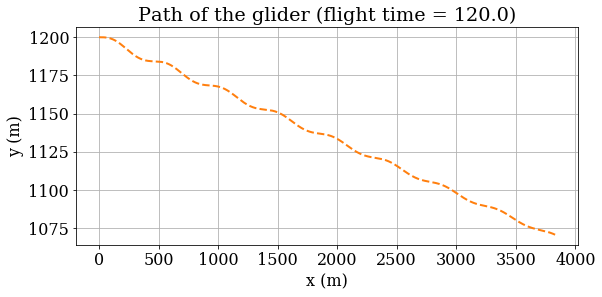

In [10]:
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Path of the glider (flight time = {})'.format(T))
pyplot.xlabel('x (m)')
pyplot.ylabel('y (m)')
pyplot.grid()
pyplot.plot(x, y, color='C1', linestyle='--', linewidth=2);

In [11]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

u_values = []

for dt in dt_values:
    N = int(T / dt) + 1 
    u = np.empty((N, 4))
    u[0] = np.array([v0, theta0, x0, y0])
    for n in range(N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    u_values.append(u)

In [16]:
def l1_diff(u_coarse, u_fine, dt):
    
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * np.sum(np.abs(u_coarse - u_fine[::ratio]))
    return diff

In [17]:
diff_values = []

for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:, 2], u_values[-1][:, 2], dt)
    diff_values.append(diff)

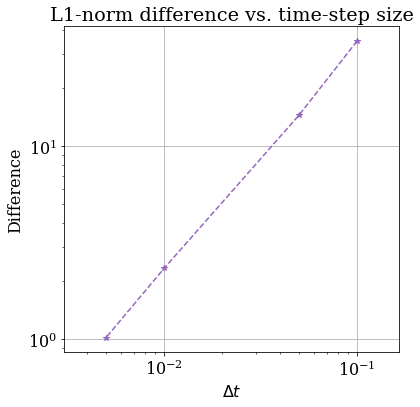

In [20]:
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm difference vs. time-step size')  
pyplot.xlabel('$\Delta t$')  
pyplot.ylabel('Difference')  
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values, color='C4', linestyle='--', marker='*')  
pyplot.axis('equal');  